# Ingeniería de features de las propiedades en venta.
La idea de este notebook es que comencemos a pensar como procesar los features del Dataset de Properatti que utilizaron para la primer entrega. La ingenieria de features lleva mucho tiempo y trabajo. En esta actividad les presentamos algunas buenas prácticas y les sugerimos algunas ideas, pero queda mucho por hacer! Les invitamos a seguir procesándolo en sus casas :)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
properati = pd.read_csv('Datasets/datos_properati.csv', delimiter=',', parse_dates = ['created_on'])

In [4]:
properati.dtypes

created_on                 datetime64[ns]
operation                          object
property_type                      object
place_with_parent_names            object
lat-lon                            object
lat                               float64
lon                               float64
price_aprox_usd                   float64
surface_total_in_m2               float64
surface_covered_in_m2             float64
price_usd_per_m2                  float64
floor                             float64
rooms                             float64
expenses                          float64
properati_url                      object
barrio                             object
comuna                            float64
dtype: object

## 1- Amigarse con el Dataset

**a)** Indica a qué grupo pertenece las variables de cada columna del Dataset, siendo los grupos:

- Numéricas. 
- Categóricas Nominales.
- Categóricas Ordinales.
- Fechas - Hora - Ubicacion.

Por ejemplo, la columna "lat" tiene variables del tipo " Fechas - Hora - Ubicacion"


In [5]:
#for col in properati.columns:
#    print(col)
    
for indice, elemento in enumerate(properati.columns):
    print(indice, elemento)

0 created_on
1 operation
2 property_type
3 place_with_parent_names
4 lat-lon
5 lat
6 lon
7 price_aprox_usd
8 surface_total_in_m2
9 surface_covered_in_m2
10 price_usd_per_m2
11 floor
12 rooms
13 expenses
14 properati_url
15 barrio
16 comuna


In [11]:
tipo_variable = [None]*len(properati.columns)
#Numéricas.
#Categóricas Nominales.
#Categóricas Ordinales.
#Fechas - Hora - Ubicacion.
tipo_variable[0] = 'Fechas - Hora - Ubicacion'
tipo_variable[1] = ''
tipo_variable[2] = ''
tipo_variable[3] = ''
tipo_variable[4] = ''
tipo_variable[5] = 'Fechas - Hora - Ubicacion'
tipo_variable[6] = ''
tipo_variable[7] = ''
tipo_variable[8] = ''
tipo_variable[9] = ''
tipo_variable[10] = ''
tipo_variable[11] = ''
tipo_variable[12] = ''
tipo_variable[13] = ''
tipo_variable[14] = ''
tipo_variable[15] = ''
tipo_variable[16] = ''

for orden,col in enumerate(properati.columns):
    print('{} - En la columna "{}" tenemos variables de tipo "{}" \n'.format(orden,col,tipo_variable[orden]))

0 - En la columna "created_on" tenemos variables de tipo "Fechas - Hora - Ubicacion" 

1 - En la columna "operation" tenemos variables de tipo "" 

2 - En la columna "property_type" tenemos variables de tipo "" 

3 - En la columna "place_with_parent_names" tenemos variables de tipo "" 

4 - En la columna "lat-lon" tenemos variables de tipo "" 

5 - En la columna "lat" tenemos variables de tipo "Fechas - Hora - Ubicacion" 

6 - En la columna "lon" tenemos variables de tipo "" 

7 - En la columna "price_aprox_usd" tenemos variables de tipo "" 

8 - En la columna "surface_total_in_m2" tenemos variables de tipo "" 

9 - En la columna "surface_covered_in_m2" tenemos variables de tipo "" 

10 - En la columna "price_usd_per_m2" tenemos variables de tipo "" 

11 - En la columna "floor" tenemos variables de tipo "" 

12 - En la columna "rooms" tenemos variables de tipo "" 

13 - En la columna "expenses" tenemos variables de tipo "" 

14 - En la columna "properati_url" tenemos variables de tipo 

**b-** Indica qué columnas tienen NaNs. En caso de tenerlos, cuántos

In [12]:
# Respuesta
def draw_missing_data_table(df):
    total = df.isnull().sum().sort_values(ascending=False)
    percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    return missing_data

properati.info()
draw_missing_data_table(properati)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18979 entries, 0 to 18978
Data columns (total 17 columns):
created_on                 18979 non-null datetime64[ns]
operation                  18979 non-null object
property_type              18979 non-null object
place_with_parent_names    18979 non-null object
lat-lon                    18979 non-null object
lat                        18979 non-null float64
lon                        18979 non-null float64
price_aprox_usd            17445 non-null float64
surface_total_in_m2        16586 non-null float64
surface_covered_in_m2      16876 non-null float64
price_usd_per_m2           16037 non-null float64
floor                      2756 non-null float64
rooms                      13517 non-null float64
expenses                   3815 non-null float64
properati_url              18979 non-null object
barrio                     18979 non-null object
comuna                     18979 non-null float64
dtypes: datetime64[ns](1), float64(10), ob

,Total,Percent
floor,16223,0.854787
expenses,15164,0.798988
rooms,5462,0.287792
price_usd_per_m2,2942,0.155013
surface_total_in_m2,2393,0.126087
surface_covered_in_m2,2103,0.110807
price_aprox_usd,1534,0.080826
lat-lon,0,0.000000
operation,0,0.000000
property_type,0,0.000000


## 2- Manejo de NaNs.
Muchas veces no queremos eliminar las instancias que posean NaNs en algun atributo / feature. 


**a)** Les proponemos utilizar el imputer de Scikit-learn para reemplazar los valores faltantes con algún indicador estadústico. Por ejemplo, en la columna "price_usd_per_m2" podemos reemplazar los valores faltantes por la mediana (les parece correcta esta elección?).

In [13]:
from sklearn.preprocessing import Imputer
#from sklearn.impute import SimpleImputer
#imp = SimpleImputer(missing_values='NaN', strategy='median', axis=0)
imp = Imputer(missing_values='NaN', strategy='median', axis=0)
## Completar con la instruccion fit_transform. Utilizar como argumento properati[['price_aprox_usd']]
properati_price_imp  = imp.fit_transform(properati[['price_aprox_usd']])

C:\Users\user\Anaconda3\envs\AcamicaDs1\lib\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [14]:
print(imp.statistics_)
draw_missing_data_table(properati)

[180000.]


,Total,Percent
floor,16223,0.854787
expenses,15164,0.798988
rooms,5462,0.287792
price_usd_per_m2,2942,0.155013
surface_total_in_m2,2393,0.126087
surface_covered_in_m2,2103,0.110807
price_aprox_usd,1534,0.080826
lat-lon,0,0.000000
operation,0,0.000000
property_type,0,0.000000


**b)** Chequear cuántas columnas tiene la variable "properati_price_imp". Tiene algún NaN?

In [49]:
### Respuesta
pd.isnull(properati_price_imp).any()

False

In [66]:
properati['price_aprox_usd'].head(3)

0    2000000.0
1     790000.0
2     343000.0
Name: price_aprox_usd, dtype: float64

In [65]:
properati_price_imp[:3,]

array([[2000000.],
       [ 790000.],
       [ 343000.]])

**c)** Reemplazar los valores de la columna "properati['price_aprox_usd']"  por los valores de la variable "properati_price_imp".

In [73]:
### Respuesta
properati.at[properati.index, 'price_aprox_usd'] = properati_price_imp
properati['price_aprox_usd'].head(3)

0    2000000.0
1     790000.0
2     343000.0
Name: price_aprox_usd, dtype: float64

In [76]:
properati['price_aprox_usd']=properati_price_imp

**d)** Responder:
    - Cuáles son ahora las instancias con valores faltantes?
    - Se modificó la mediana de la columna 'price_aprox_usd'? Por qué?
    - Proponer (y NO efectuar) una estrategia para procesar otra columna con valores faltantes.

In [86]:
properati.isnull().any()

created_on                 False
operation                  False
property_type              False
place_with_parent_names    False
lat-lon                    False
lat                        False
lon                        False
price_aprox_usd            False
surface_total_in_m2         True
surface_covered_in_m2       True
price_usd_per_m2            True
floor                       True
rooms                       True
expenses                    True
properati_url              False
barrio                     False
comuna                     False
dtype: bool

**e)** Eliminar el resto de las features que tienen valores faltantes. 

## 3- Extrayendo información útil

Los algoritmos de aprendizaje automático que utilizaremos reconocerán patrones en los atributos (o combinaciones de ellos) que les introduzcamos. Entonces, la calidad de funcionamiento del algoritmo esta íntimamente relacionada al preprocesamiento de estos atributos. 


En este caso, las variables del grupo "Fechas - Hora - Ubicacion" pocas veces nos dan la información que queremos y muchas veces hay que reescribirlas. Les proponemos crear **nuevas features** de las cuales sea mas fácil extraer informacion. 


**a)** Les proponemos crear 3 features nuevas, una con el año en que fue publicada cada casa, otra con el mes, y otra con el día. Tomamos como materia prima la información de la columna 'created_on'.

Les mostramos un ejemplo creando la columna "anio", y les proponemos que hagan "mes" y "dias" por su cuenta.

In [87]:
properati['anio'] = pd.DataFrame((properati['created_on'].map(lambda x: x.year)))
if False: properati['mes'] = None
if False: properati['dia'] = None

### 4- Manipulación de variables categóricas nominales (o dummies).
Usando LabelEncoder de Scikit-learn podemos transformar nuestras variables categóricas en numéricas sin pasar por variables dummies. Luego, vamos a utilizar OneHotEncoder para transformar las categorías numéricas en categorías binarias.


Nos centraremos en la columna 'property_type'.

In [88]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

 
(properati['property_type']).head()

0    house
1    store
2    store
3    store
4    store
Name: property_type, dtype: object

In [89]:
# Llamamos al algoritmo
le_prop_type = LabelEncoder()
# Lo fiteamos con las categorias que tenemos en nuestro dataset.
le_prop_type.fit(properati['property_type'])

LabelEncoder()

In [90]:
# Estas son las categorias que eligio el algoritmo. Les asignara un numero a cada categoria, 
# yendo de izquierda a derecha [recordemos que python cuenta desde 0]
le_prop_type.classes_

array(['PH', 'apartment', 'house', 'store'], dtype=object)

In [91]:
#Transformamos la categoria "property_type" en numeros.
cat_prop_type = le_prop_type.transform(properati['property_type'])

[2 3 3 ... 3 1 1]


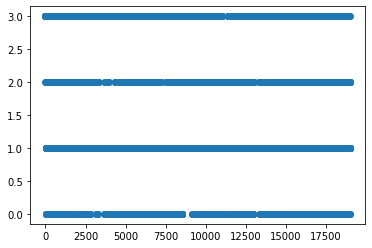

In [96]:
#Les proponemos formas de visualizar que hizo sckit-learn
print(cat_prop_type)
plt.plot(cat_prop_type,'o')

In [97]:
# Actualizamos el viejo dataset
properati['property_type'] = cat_prop_type

Ahora vamos a transformar las categorías numéricas que acabamos de definir, en binarias. De lo contrario, el algoritmo de ML que vayamos a usar las interpretaria como variables categoricas ordinales [y no lo son!].

In [98]:
onehot_encoder = OneHotEncoder(sparse = False)
# No olvidemos que hay que cambiarle las dimensiones al set de etrenamiento del OneHotEncoder!
cat_prop_type_rs = cat_prop_type.reshape(-1,1)
print(cat_prop_type_rs)

[[2]
 [3]
 [3]
 ...
 [3]
 [1]
 [1]]


In [99]:
#Como estamos cancheres, realizamos directamente el fit y transform juntos!
cat_prop_type_encoded = onehot_encoder.fit_transform(cat_prop_type_rs)
print(cat_prop_type_encoded)

[[0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 ...
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]]


C:\Users\user\Anaconda3\envs\AcamicaDs1\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


**a)** RESPONDER:

    - Por qué la variable 'cat_prop_type_encoded' tiene esa forma? Qué significa cada cosa?
    - Podriamos haber usado el OneHotEncoder sin utilizar primero el LabelEncoder?

In [100]:
print(cat_prop_type_encoded)

[[0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 ...
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]]


**b)** Scikit-learn tiene una excelente documentación. Te proponemos que lo chequees por vos misme. Te proponemos que explores https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html. Qué funciones tiene? Qué te parece que hace la función *inverse_transform*?

**c)** Utilizando la estrategia que quieras, elegí otra variable dummie y convertila en categórica binaria [No te olvides que aprender a programas es copiar y pegar. Sin embargo, es muy importante que estes segure de saber qué estas haciendo en cada paso]

### 5- Desafio.
- Crea una columna que indique el precio promedio por m2 en cada barrio. Te parece que es útil? Para qué?
- Crea una columna que tenga un 1 si la propiedad es del sur de la Ciudad de Buenos Aires y 0 si no lo es (y es del norte).


NameError: name 'barrio' is not defined